<a href="https://colab.research.google.com/github/sanyam1992000/self-face-recognition/blob/master/prediction_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***To Do First***

[Folder](https://drive.google.com/drive/folders/1k_w4LQGvxtD7zpu82ChG8LGAw0XNSv6r?usp=sharing)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
!wget -O "export.pkl" "https://drive.google.com/uc?id=1gagDEY69S5wHwl8AbcPFkKtRuWOj3nz1"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
predictor = load_learner('/content/drive/My Drive')

In [6]:
def my_predictor(im):
  test_img = open_image(im)
  pred_class,pred_idx,outputs = predictor.predict(test_img)
  return pred_class

# ***Predict by passing Images Url***

In [ ]:
url = input("Enter URL")
!wget -O "sample.jpg" {url}

Enter URLhttps://i.pinimg.com/736x/2a/df/fb/2adffbee6e939b2bd1e32ffa8c763308.jpg
--2020-08-01 16:43:38--  https://i.pinimg.com/736x/2a/df/fb/2adffbee6e939b2bd1e32ffa8c763308.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.193.24.222, 2600:1417:76:49a::1931, 2600:1417:76:482::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.193.24.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98993 (97K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  96.67K  --.-KB/s    in 0.007s  

2020-08-01 16:43:38 (14.0 MB/s) - ‘sample.jpg’ saved [98993/98993]



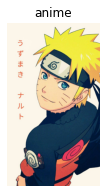

In [ ]:
counter = 0
os.makedirs("output",exist_ok=True)
img = open_image('/content/sample.jpg')
title = str(my_predictor('/content/sample.jpg'))
img.show(title=title)
plt.savefig("output/output{}.jpg".format(counter))
counter += 1

# ***Predict by Uploading Images***

In [7]:
from google.colab import files
my_file = files.upload()

Saving sanyam.jpg to sanyam.jpg


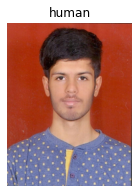

In [8]:
path = list(my_file.keys())
c = len(path)
os.makedirs("output",exist_ok=True)

counter = 0
for i in path:
  img = open_image(i)
  title = str(my_predictor(i))
  img.show(title=title)
  plt.savefig("output/output{}.jpg".format(counter))
  counter += 1

# ***Predict By Uploading Video***

In [ ]:
import cv2, os
os.makedirs("output",exist_ok=True)
  
def FrameCapture(path): 
    vidObj = cv2.VideoCapture(path) 
    count = 0
    success = 1
  
    while success: 
        success, image = vidObj.read() 
        try:
          cv2.imwrite("output/frame%d.jpg" % count, image) 
        except:
          return
        count += 1

In [ ]:
from google.colab import files
my_file = files.upload()

Saving Shino's Face without sunglasses , Naruto funny moment!!-CFDFJkc5YDc.webm to Shino's Face without sunglasses , Naruto funny moment!!-CFDFJkc5YDc.webm


In [ ]:
path = list(my_file.keys())
os.makedirs("output",exist_ok=True)

for i in path:
  FrameCapture(i)

In [ ]:
% time
path = os.listdir('/content/output')
counter = 0
os.makedirs("output",exist_ok=True)
path.sort(key = lambda x: (len(x),x))
path

In [ ]:
% time

for i in path[:100]:
  img = open_image('/content/output/'+ i)
  title = str(my_predictor('/content/output/'+ i))
  img.show(title=title)
  plt.savefig("output/output{}.jpg".format(counter))
  counter += 1

# ***Output to Video***

In [ ]:
%cd "output"
!ffmpeg -framerate 2 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../anime_vs_human_output.mp4
%cd ..

/content/output
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libx

In [ ]:
!pip install -U kora
from kora.drive import upload_public

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.4.23)


In [ ]:
url = upload_public('anime_vs_human_output.mp4')
print(url)

https://drive.google.com/uc?id=1KgOs4DTtj_FMyylM2QzWA5RHTaIemwRY


In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")